# Bibliothèque

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
from scipy.io import  wavfile as wav
from IPython.display import display, Audio

# Lecture des fichier sonore

In [186]:
Fe, signal = wav.read("son_a.wav")
display(Audio(signal, rate=Fe))

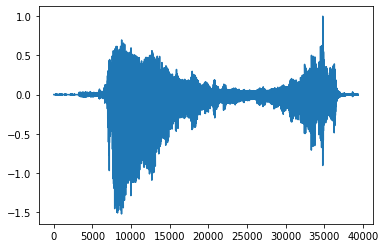

In [187]:
signal = signal / signal.max()
plt.plot(signal)

# Découpage du signal en trame

In [188]:
Te = 1/Fe
N = len(signal)
# Calcul du nombre d'echantillons par trame de 20 ms
n_trame = int(20*10**(-3) / Te)
nb_trame = int(N/n_trame)

In [189]:
signal_trame = np.zeros((nb_trame, n_trame))
for i in range(nb_trame):
    signal_trame [i, :] = signal[i*n_trame:(i+1)*n_trame]
    

# Fenêtrage

In [190]:
H = np.hamming(n_trame)
signal_fenetre = np.zeros(signal_trame.shape)
signal_fenetre = signal_trame*H 

# Fonction pour découper en trame et fenetrer un signal

In [191]:
def dec_trame(signal, Fe, temps_trame):
    Te = 1/Fe
    N = len(signal)
    
    # Calcul du nombre d'echantillons par trame de 20 ms
    n_trame = int(temps_trame / Te)
    nb_trame = int(N/n_trame)
    
    # Découage  en trame de temps_trame
    signal_trame = np.zeros((nb_trame, n_trame))
    for i in range(nb_trame):
        signal_trame [i, :] = signal[i*n_trame:(i+1)*n_trame]
    
    # Fenetrage
    x_fenetre = signal_trame * np.hamming(n_trame)

    return  x_fenetre 

In [192]:
sf = dec_trame(signal, Fe, 20*10**(-3))

# Construire la Matrice $R_{pk}$

In [193]:
K = 4
Rpk = np.zeros((nb_trame,2*K, 2*K))
Rp = np.zeros((nb_trame, 2*K))
ak = np.zeros((nb_trame, 2*K))
cpt=0
for i in range(len(signal_trame)):
    for p in range(2*K):
        for k in range(2*K):
            for e in range(len(signal_trame[i])):
                if (e-p) >= 0 and (e-k)>= 0:
                    Rpk[i,p,k] += signal_trame[i, e] *signal_trame[i, e- np.abs(k-p)]
              
                     
    cpt+=1

In [194]:
Rpk[0, 0:3, 0:3]

array([[ 4.50138926e-05, -3.71626323e-05,  2.61708678e-05],
       [-3.71626323e-05,  4.50138926e-05, -3.71626323e-05],
       [ 2.61708678e-05, -3.71626323e-05,  4.50138926e-05]])

In [195]:
for i in range(len(Rpk)):
    for p in range(8):
        for e in range(np.abs(p), len(signal_trame[i])):
            if e-p >= 0:
                Rp[i,p] += signal_trame[i, e-p] *signal_trame[i, e]
            else:
                Rp[i,p] = 0
                
                

In [196]:
index = 100
ak[index] = np.dot(np.linalg.inv(Rpk[index]),(-Rp[index]))
ak[index]

array([-1.00000000e+00, -3.55271368e-14,  1.77635684e-14,  1.77635684e-15,
       -6.21724894e-15, -6.66133815e-16,  1.11022302e-15, -3.88578059e-16])

# Algorithme Durbin-Levinson

In [197]:
# initialisation des vecteurs
K = 4
ak = np.zeros((nb_trame, 2*K))
E = np.zeros((2*K))

# Initialisation des a0 à 1 sur toutres les trames
ak[:,0] = 1
for t in range(len(Rpk)):
  E[0] = Rpk[t, 0, 0]
  for i in range(1, 2*K):
    sum = 0
    ki = Rpk[t,i,i]
    for j in range(i-1):
      sum += ak[t, i-1]*Rpk[t,  np.abs(i-j), np.abs(i-j)]
    sum = (1/E[i-1])* (Rpk[t, i, i] - sum)

    ak[t, i] = ki
    ak[t,0:i+1]
    for z in range(1, i+1):
      ak[t,z] = ak[t,z-1] - ki* ak[t, z - i]   

    E[i] = (1 - ki**2)* E[i-1]


# fonction de trasfert

In [266]:
HH = np.zeros((ak.shape[0], 1))
f=np.arange(-Fe/2,Fe/2,8)
for k in range(1,len(ak)):
  sum = 0
  for i in range(len(ak[k])):
    sum += ak[k,i]*np.exp(-1j*(2*np.pi*f[i]*i*Te))  

  HH[k,0] = 1/(1-sum)
HH

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[ 0.00000000e+00],
       [ 9.99712240e-01],
       [ 9.99657621e-01],
       [ 9.99609448e-01],
       [ 9.99594106e-01],
       [ 9.99664678e-01],
       [ 9.99686465e-01],
       [ 9.99606993e-01],
       [ 9.99641665e-01],
       [ 9.99605765e-01],
       [ 9.99614357e-01],
       [ 9.99661303e-01],
       [ 9.99624789e-01],
       [ 9.99626630e-01],
       [ 9.99616504e-01],
       [ 9.99603924e-01],
       [ 9.99696284e-01],
       [ 9.99632767e-01],
       [ 9.99613743e-01],
       [ 9.99724208e-01],
       [ 1.04443284e+00],
       [ 1.05247439e+00],
       [ 1.06459284e+00],
       [ 1.13929391e+00],
       [ 1.07187255e+00],
       [ 1.09004867e+00],
       [ 1.06878015e+00],
       [ 1.08796934e+00],
       [ 1.05605799e+00],
       [ 1.09233818e+00],
       [ 1.07850094e+00],
       [ 1.05782254e+00],
       [ 1.03845735e+00],
       [ 1.05489433e+00],
       [ 1.03601709e+00],
       [ 1.04080900e+00],
       [ 1.20028585e+00],
       [ 1.17254226e+00],
       [ 1.2

## LPC filter reconstruction


In [198]:
LAR = np.zeros(ak.shape)
for t in range(len(ak)):
  for e in range(len(ak[t])):
    LAR[t,e] = np.math.log10(np.abs( (1 + ak[t,e]) / (1- ak[t,e] + 1e-6)))


In [199]:
LAR

array([[6.30103   , 4.64456789, 4.34835409, ..., 3.9533105 , 3.95330666,
        3.87443195],
       [6.30103   , 4.45680341, 4.15889294, ..., 3.76280565, 3.76279969,
        3.68379923],
       [6.30103   , 4.54857893, 4.25140578, ..., 3.8557724 , 3.85576759,
        3.77682278],
       ...,
       [6.30103   , 3.01817283, 2.71725847, ..., 2.318558  , 2.31838928,
        2.23840477],
       [6.30103   , 3.16822102, 2.86735614, ..., 2.46892904, 2.46881009,
        2.38906298],
       [6.30103   , 3.47191827, 3.17121089, ..., 2.77317253, 2.77311376,
        2.69367011]])

# Appliquer le filtre au signal musical 

In [200]:
Fe2, saxo = wav.read("saxo.wav")
saxo_trame = dec_trame(saxo, Fe, 20*10**(-3))

In [201]:
saxo_trame = saxo_trame[0:246]/saxo_trame.max()
saxo_trame.shape

(246, 160)

In [267]:
nfft = 1024
xf = np.fft.fft(saxo_trame, nfft).T

In [268]:
son_f = xf@HH
son_f = np.reshape(son_f, (nfft,))
son = np.fft.ifft(son_f, nfft)

In [269]:
son.shape

(1024,)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


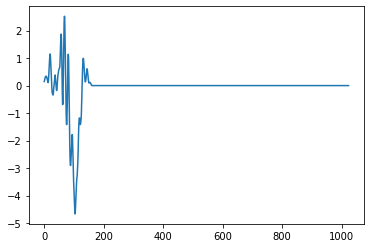

In [270]:
plt.plot(son)

In [271]:
display(Audio(son, rate=Fe))

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
